# Práctica 2.

## Semana 1. Vecinos próximos

Read data

In [266]:
import numpy as np
import pandas as pd


filename="ConjuntosDatosP2/pima-indians-diabetes.data"
filename2="ConjuntosDatosP2/wdbc.data"
data = pd.read_csv(filename)
data1=pd.read_csv(filename2)

column_names=list(data.columns)
column_names1=list(data1.columns)
print(column_names, column_names1)
class_name="Class"

class_list=data[class_name].values
class_list1=data1[class_name].values

['Pregs', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class'] ['Atributo1', 'Atributo2', 'Atributo3', 'Atributo4', 'Atributo5', 'Atributo6', 'Atributo7', 'Atributo8', 'Atributo9', 'Atributo10', 'Atributo11', 'Atributo12', 'Atributo13', 'Atributo14', 'Atributo15', 'Atributo16', 'Atributo17', 'Atributo18', 'Atributo19', 'Atributo20', 'Atributo21', 'Atributo22', 'Atributo23', 'Atributo24', 'Atributo25', 'Atributo26', 'Atributo27', 'Atributo28', 'Atributo29', 'Atributo30', 'Class']


Normalize data: calcularMediasDesv(self,datos,nominalAtributos); normalizarDatos(self,datos,nominalAtributos):

In [74]:
#Read and normalize data

norm_data=[]
mean_array=[]
std_array=[]
for col in column_names:
    if col!=class_name:
        atr=data[col].values
        mean=np.mean(atr)
        std=np.std(atr)
        atr=(atr-mean)/std
        mean_array.append(mean)
        std_array.append(std)
        norm_data.append(atr)
print(norm_data)

Elejimos una linea de datos aleatoria para clasificar

In [55]:
test_line_id=np.random.randint(0,data.shape[0])
test_line=data.iloc[test_line_id]
print(test_line)

Pregs      8.000
Plas     176.000
Pres      90.000
Skin      34.000
Test     300.000
Mass      33.700
Pedi       0.467
Age       58.000
Class      1.000
Name: 53, dtype: float64


Elejimos los atributos de interes y normalizamos los datos que queremos clasificar

In [67]:
def normalize_point(atributes, col_ids):
    norm_atr=[];
    for i in range(len(atributes)):
        norm_atr.append((atributes[i]-mean_array[col_ids[i]])/std_array[col_ids[i]])
    return(norm_atr)

test_atr_ids=["Pregs", "Plas", "Pres"]
#Los ids de columnas se utilizan para acceder los arrays de medias, std y los datos normalizados
column_ids=[]
test_atr=[]
for col in test_atr_ids:
    column_ids.append(data.columns.get_loc(col))
    test_atr.append(test_line[col])
    
print(test_atr)

norm_point=normalize_point(test_atr, column_ids)

print(norm_point)

[8.0, 176.0, 90.0]
[1.2338801856003137, 1.724643863785235, 1.0802002507534205]


Calculamos distancia Euclidea y Manhatten

In [95]:
def euclidian_distance(point_atr, col_ids, normalized_data):
    i=0
    square_dist=0
    for col in col_ids:
        square_dist=square_dist+(normalized_data[col]-point_atr[i])**2
        i+=1
    square_dist=square_dist**0.5
    return(square_dist)

def manhatten_distance(point_atr, col_ids, normalized_data):
    i=0
    dist=0
    for col in col_ids:
        dist=dist+(normalized_data[col]-point_atr[i])
        i+=1
    return(abs(dist))

def mahalanobis_distance(point_atr, col_ids, normalized_data):
    
    
dist_euc=euclidian_distance(norm_point, column_ids, norm_data)
dist_man=manhatten_distance(norm_point, column_ids, norm_data)


Funcion de k-vecinos proximos

In [101]:
from statistics import mode 
def kneigbour_class(dist, k, class_list):
    idx = np.argpartition(dist, k)
    idx=idx[0:k]
    return mode(class_list[idx])

classified=kneigbour_class(dist_euc, 7, class_list)
print(classified)
print(kneigbour_class(dist_man, 7, class_list))



1
1


Mahalanobis distance <-hay que acabarlo

In [144]:
#for i in range(data.shape[0])

matrix=np.matrix(norm_data)
matrix=np.transpose(matrix)
example=matrix[1,column_ids]


X = np.stack((example, np.matrix(norm_point)), axis=0)
print(X)
cov=np.cov(X)
print(cov)
dist=(np.transpose(example - norm_point)*np.linalg.inv(cov)*(example - norm_point))**0.5

print(dist)

[[-0.84488505 -1.12339636 -0.16054575]
 [ 1.23388019  1.72464386  1.08020025]]
[[ 0.24549502 -0.1437259 ]
 [-0.1437259   0.11329568]]


ValueError: shapes (3,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

## Semana 2. Regresión logistica
ClasificadorRegresionLogistica


Indians:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [267]:
class ClasificadorRegresionLogistica:
    def __init__(self,train_set, classes):
        self.train_set=train_set
        self.classes=classes
        self.class_names=np.unique(self.classes)
        self.class1=self.class_names[0]
    def gradient_descent(self, rounds, eta):
        
        self.w=np.zeros(train_set.shape[1]+1)+0.5
        for r in range(rounds):
            for i in range(train_set.shape[0]):
                x=np.array(train_set.iloc[i].values)
                x=np.insert(x,0,1)
                x=np.transpose(x)
                if classes[i]==class1:
                    t=1
                else:
                    t=0
                wx=np.dot(self.w,x)
                self.w=self.w-eta*(1/(1+np.exp(-wx))-t)*x
        return(self.w)
    def classify(self,x):
        x=np.array(x)
        x=np.insert(x,0,1)
        x=np.transpose(x)
        wx=np.dot(self.w,x)
        if wx>=0:
            return self.class1
        else:
            return self.class_names[1]

In [270]:
import matplotlib.pyplot as plt

atributes=["Pregs","Plas","Pres","Skin","Test"]
filter_zeros=[False, True, True, True, True]

#Selecting only columns with atributes required
train_set=data[atributes]
#Filtering zero values
for i in range(len(atributes)):
    if filter_zeros[i]:
        train_set=train_set.loc[train_set[atributes[i]]!=0]

classes=data[class_name].values
        
model=ClasificadorRegresionLogistica(train_set,classes)
w=model.gradient_descent(2, 0.2)
print(w)

x=[5,166,72,19,175]
print(model.classify(x))

[  0.7   3.5  34.7 -29.1   5.1  19.3]
0


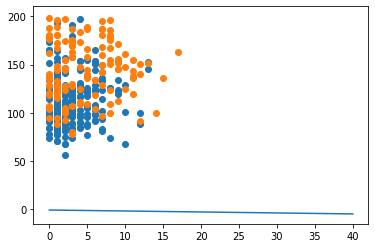

In [272]:
x_a=np.array([0,40])
y_a=-w[1]/w[2]*x_a-w[0]


data_c1=train_set.loc[data['Class'] == 0]
data_c2=train_set.loc[data['Class'] == 1]
plt.scatter(data_c1[atributes[0]], data_c1[atributes[1]])
plt.scatter(data_c2[atributes[0]], data_c2[atributes[1]])
plt.plot(x_a,y_a)

In [281]:
atributes=["Atributo1","Atributo2","Atributo3","Atributo4","Atributo5"]
filter_zeros=[False, True, True, True, True]

#Selecting only columns with atributes required
train_set1=data1[atributes]

classes1=data1[class_name].values
        
model1=ClasificadorRegresionLogistica(train_set1,classes1)
w1=model1.gradient_descent(2, 0.2)
print(w1)
x=[14.54,27.54,96.73,658.8,0.1139]
print(model1.classify(x))

[  0.7   3.5  34.7 -29.1   5.1  19.3]
B


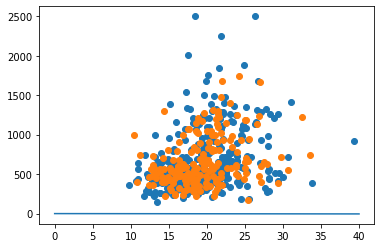

In [276]:
x_a=np.array([0,40])
y_a=-w1[1]/w1[2]*x_a-w1[0]


data_c1=train_set1.loc[data['Class'] == 0]
data_c2=train_set1.loc[data['Class'] == 1]
plt.scatter(data_c1[atributes[1]], data_c1[atributes[3]])
plt.scatter(data_c2[atributes[1]], data_c2[atributes[3]])
plt.plot(x_a,y_a)